<h1 style="color:blue; font-size:32">Thera Bank Personal Loan Campaign</h1>

<h2>1.Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. <h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df['Experience'] = df['Experience'].abs()
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape # 5000 rows 14 cols

(5000, 14)

In [5]:
df.describe() #The max age is 67 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.info() 
df.isna().sum()
#not null values...all good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<h2>2.EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings</h2>

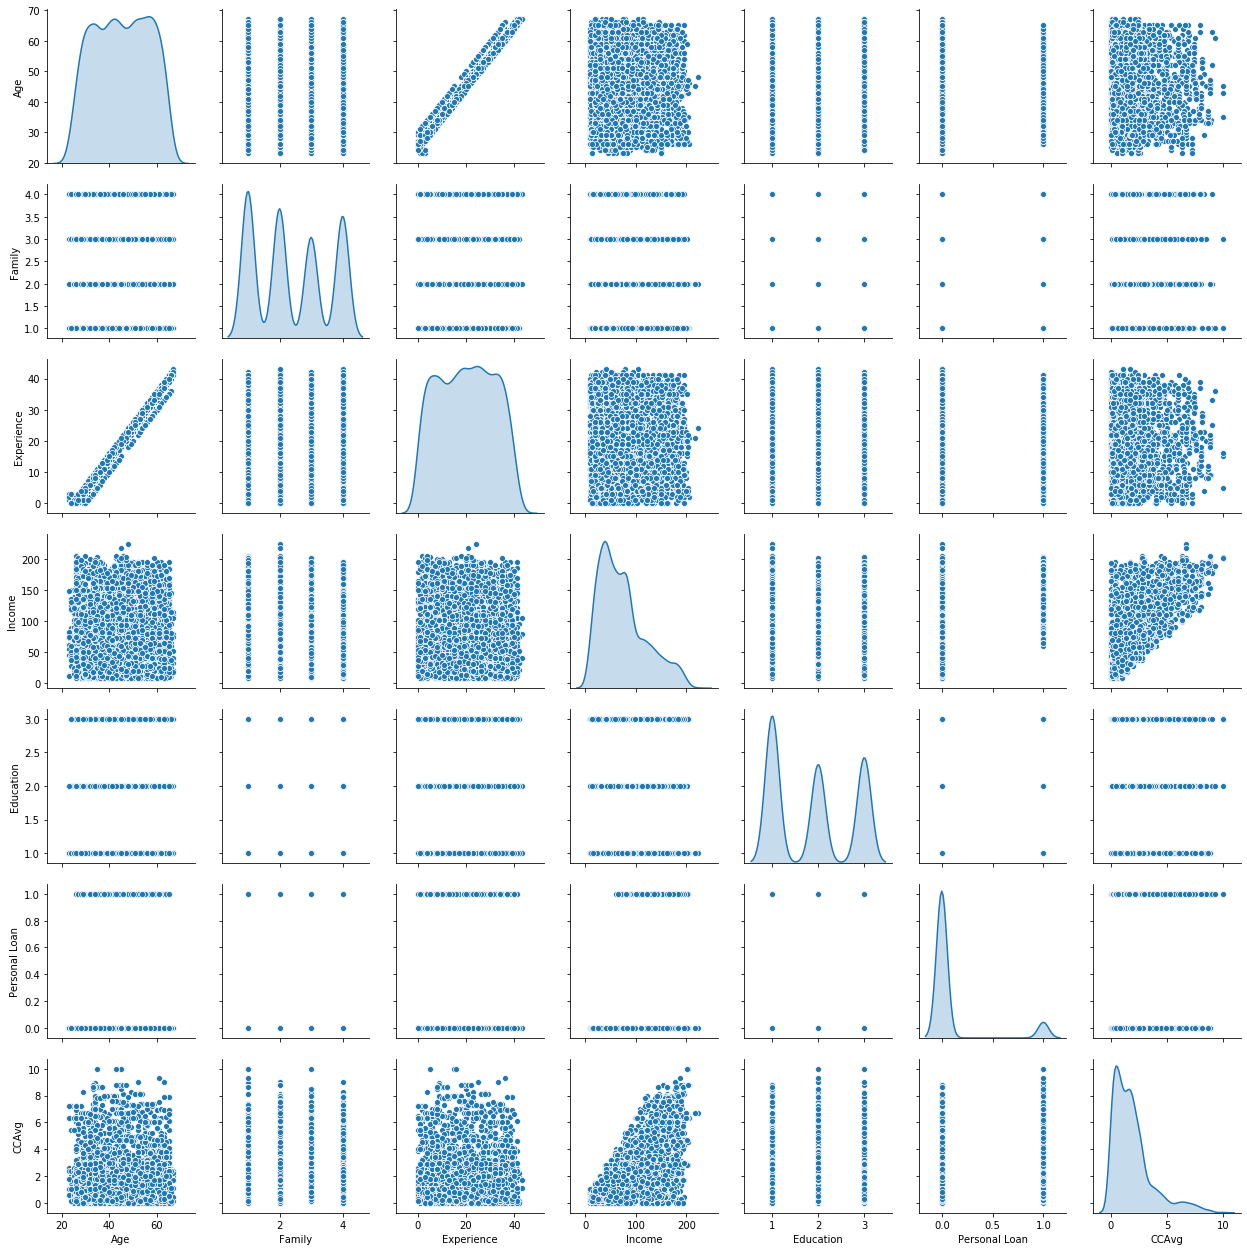

In [7]:
sns.pairplot(df[["Age", "Family", "Experience", "Income", "Education", "Personal Loan", "CCAvg"]], diag_kind='kde')

In [8]:
df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.010038
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [9]:
# Finding the number of unique values on each column
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
# Amount of people with 0 mortgage
print(df[df["Mortgage"] == 0]["Mortgage"].count())
print(' ')
# Amount of people with 0 cc spending per month
print(df[df["CCAvg"] == 0]["CCAvg"].count())

3462
 
106


In [11]:
# Value counts of all categorical columns.
for i in df.columns:
    if len(df[i].unique()) < 4:
        x = df[i].value_counts()
        print(i)
        print(x)
        print(" ")

Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
 
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
 
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
 
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
 
Online
1    2984
0    2016
Name: Online, dtype: int64
 
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
 


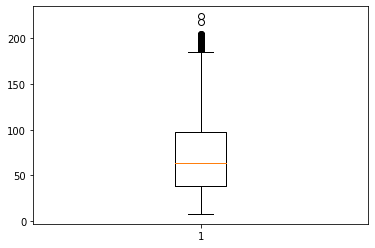

In [12]:
# Univariate and Bivariate
plt.boxplot(data=df, x="Income", )
plt.show()

In [20]:
#Maybe we can remove columns that are not adding significant information (ID, Online, Securities Account)
df2 = df[["Income", "Age", "Family", "Experience", "CCAvg", "Education", "Mortgage", "Personal Loan", "CD Account", "CreditCard"]]

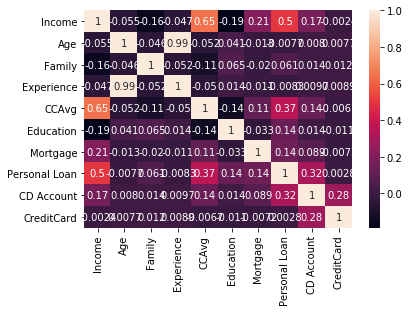

In [21]:
# Lets find the correlation of this new dataset
sns.heatmap(df2.corr(), annot=True)
plt.show()
#Income has a strong correlation with CCAVg and Personal Loan but a negative correlation with the Family, 
# Family has a negative correlation with CCAVg 

<h2>3. Split the data into training and test set in the ratio of 70:30 respectively</h2>

In [22]:
X = df2.drop('Personal Loan',axis=1)
Y = df2['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [23]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df2.index)) * 100))
## Perfect split!!

70.00% data is in training set
30.00% data is in test set


<h2>4. Use Logistic Regression model to predict the numberof a customers buying personal loans. Print all the metrics related for evaluating the model performance</h2>

In [24]:
model = LogisticRegression(solver="newton-cg")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0  0.053004 -0.005056  0.711627  0.011006  0.15747  1.673461  0.000757   

          7         8  intercept  
0  2.646488 -0.816233 -13.671913  


In [25]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9486666666666667


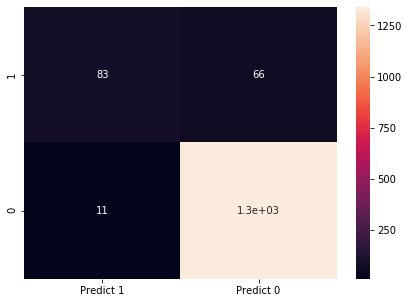

In [26]:
# Print confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = ["1","0"],
                  columns = ["Predict 1","Predict 0"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

<h2 style="color: blue">The confusion matrix<h2>
<div style="font-size: 14px">
    <p>True Positives (TP): Correctly predicted <b style="color: red">83</b> people have personal loan</p>
    <p>True Negatives (TN): Correctly predicted <b style="color: red">1300</b> people dont have personal loan</p>
    <p>False Positives (FP): Incorrectly predicted that they do have a personal loan (a "Type I error") <b style="color: red">11</b> Falsely predict positive Type I error</p>
    <p>False Negatives (FN): Incorrectly predicted that they don't have a personal loan (a "Type II error") <b style="color: red">66</b> Falsely predict negative Type II error</p>
</div>

<h2>5. Give your reasoning on how can the model perform better? </h2>
<br>
<div> Using a different value for the solver parameter the score improves a little but not that much to consider it changing for large set because is expensive for compute operations. Here is the explaination:</div>
<br></br>
<div style="font-size: 14px; font-style: oblique">1. Newton’s Method

Recall the motivation for gradient descent step at x: we minimize the quadratic function (i.e. Cost Function).
Newton’s method uses in a sense a better quadratic function minimisation. A better because it uses the quadratic approximation (i.e. first AND second partial derivatives).

You can imagine it as a twisted Gradient Descent with The Hessian (The Hessian is a square matrix of second-order partial derivatives of order nxn).

Moreover, the geometric interpretation of Newton's method is that at each iteration one approximates f(x) by a quadratic function around xn, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if f(x) happens to be a quadratic function, then the exact extremum is found in one step.

Drawbacks:

It’s computationally expensive because of The Hessian Matrix (i.e. second partial derivatives calculations).

It attracts to Saddle Points which are common in multivariable optimization (i.e. a point its partial derivatives disagree over whether this input should be a maximum or a minimum point!).</div>

<h2>6. Give Business understanding of your model? </h2>
<br>
<div>According with the model a person that will request a personal loan depends on the Income,Age,Family, CCAvg, Education,Mortgage, Personal Loan, CD Account, CreditCard so if we can use this information as an input in a automated process we can determine if a client is going to accept a loan offer when we offer it. So we can decide based on this variables good marketing campings to improve salings.</div>